# Data dictionary

# [Link to dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance)

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-za14{border-color:inherit;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-za14">Variable Name</th>
    <th class="tg-7zrl">Description</th>
    <th class="tg-7zrl">Data Type</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">age</td>
    <td class="tg-7zrl">Edad del asegurado</td>
    <td class="tg-7zrl">Numerical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">sex</td>
    <td class="tg-7zrl">Género</td>
    <td class="tg-7zrl">Categorical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">bmi</td>
    <td class="tg-7zrl">Indice de masa corporal</td>
    <td class="tg-7zrl">Numerical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">children</td>
    <td class="tg-7zrl">Número de hijos</td>
    <td class="tg-7zrl">Numerical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">smoker</td>
    <td class="tg-7zrl">Indicador si fuma</td>
    <td class="tg-7zrl">Boolean</td>
  </tr>
  <tr>
    <td class="tg-7zrl">region</td>
    <td class="tg-7zrl">Región donde vive el asegurado</td>
    <td class="tg-7zrl">Categorical</td>
  </tr>
  <tr>
    <td class="tg-7zrl">charges</td>
    <td class="tg-7zrl">Prima del seguro</td>
    <td class="tg-7zrl">Numerical</td>
  </tr>
</tbody></table>

# Import libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import missingno as msno
import os
import torch
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from mpl_toolkits.mplot3d import Axes3D # Import for 3D plotting
import tensorflow as tf # Keep tensorflow import for version printing

print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

2025-07-24 14:56:07.638085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753368967.837875      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753368967.896481      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow Version: 2.18.0
Keras Version: 3.8.0


# Load Dataset

In [3]:
# reading data
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

# Split Dataset

In [4]:
# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42) 

# Print the shapes of the resulting sets
print("train shape:", train.shape)
print("test shape:", test.shape)

train shape: (1070, 7)
test shape: (268, 7)


# Data Visualization

## Basic information

In [5]:
train.head()

age     sex    bmi  children smoker     region      charges
560    46  female  19.95         2     no  northwest   9193.83850
1285   47  female  24.32         0     no  northeast   8534.67180
1142   52  female  24.86         0     no  southeast  27117.99378
969    39  female  34.32         5     no  southeast   8596.82780
486    54  female  21.47         3     no  northwest  12475.35130

In [6]:
train.describe()

age          bmi     children       charges
count  1070.000000  1070.000000  1070.000000   1070.000000
mean     39.357009    30.560397     1.107477  13346.089736
std      14.073960     6.043386     1.215983  12019.510778
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.205000     0.000000   4897.667387
50%      39.500000    30.210000     1.000000   9575.442100
75%      51.000000    34.496250     2.000000  16746.657400
max      64.000000    53.130000     5.000000  62592.873090

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   charges   1070 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.9+ KB


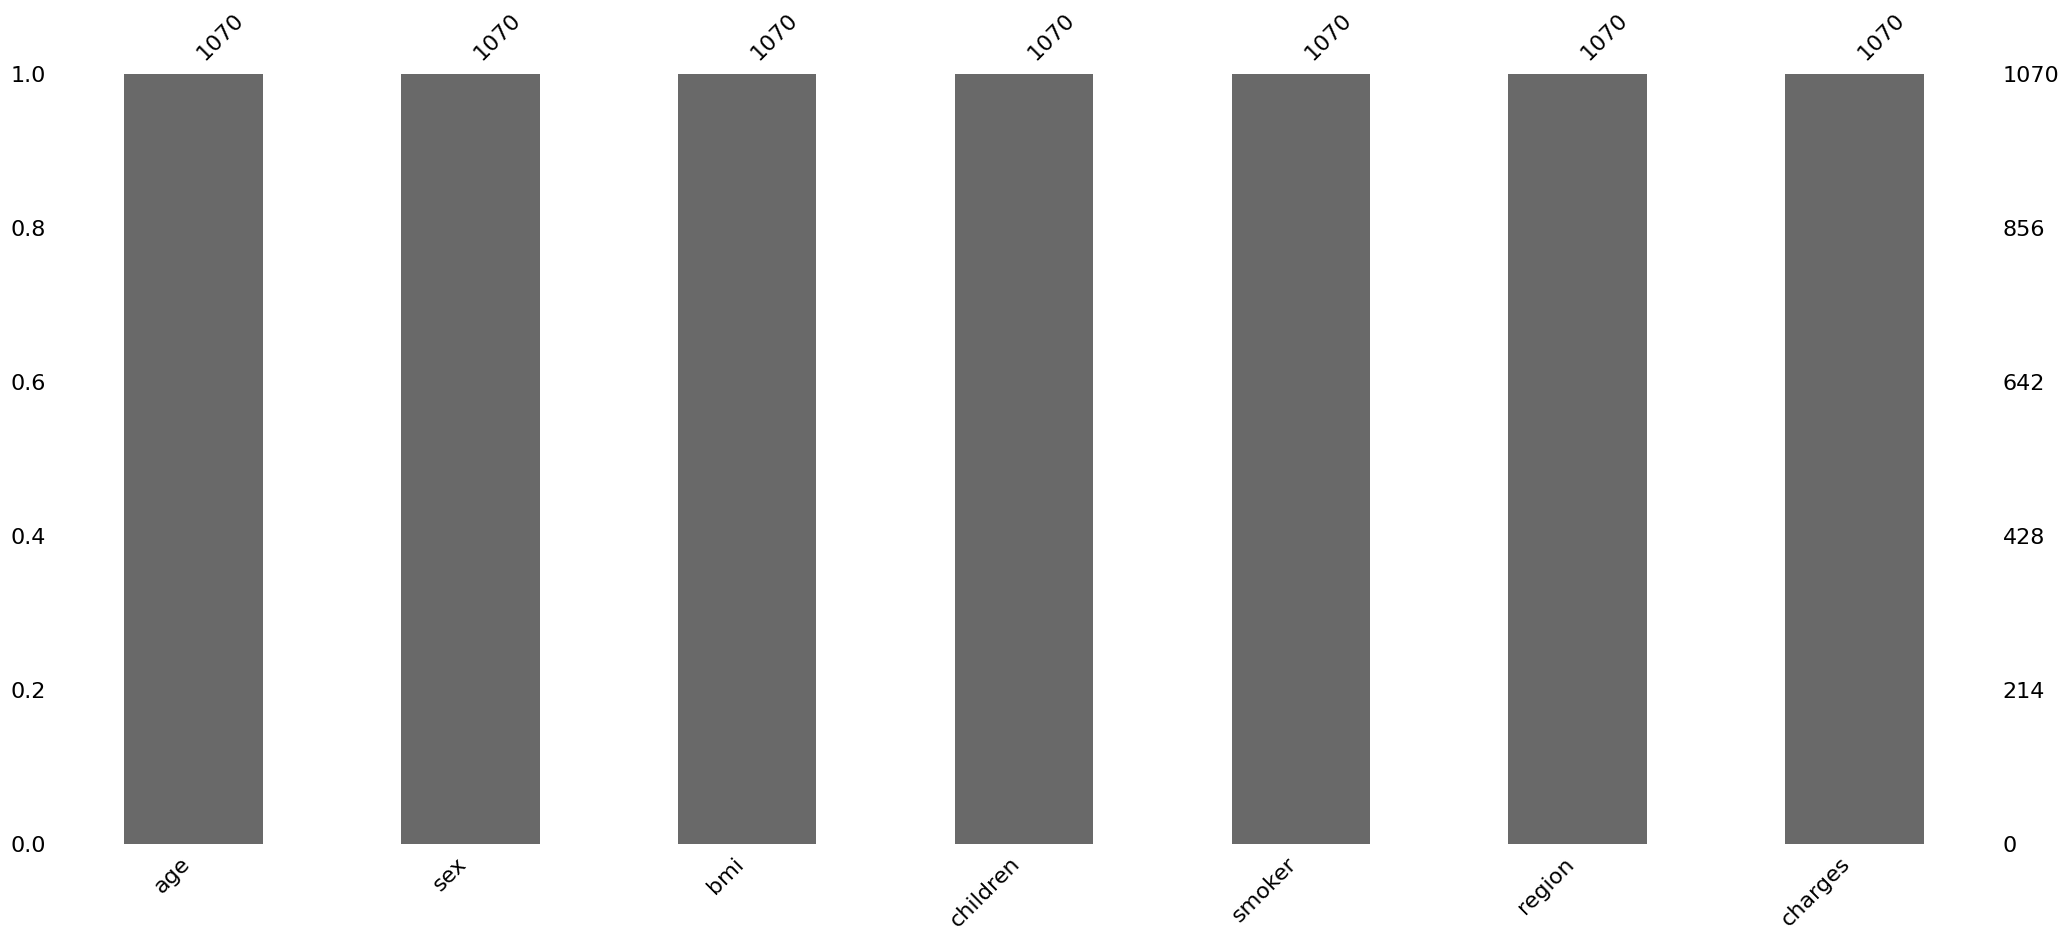

In [8]:
# looking for missing values
msno.bar(train)
plt.show()

In [9]:
train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
test.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 560 to 1126
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   charges   1070 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.9+ KB


## Correalation analysis

In [12]:
# --- Preprocess Categorical Variables for numerical representation ---
# For Spearman's, we still need numerical values.
# Binary categorical variables can be mapped to 0/1.
# Multi-category nominal variables are best handled with one-hot encoding.

# Create a copy to avoid modifying the original DataFrame directly
df_processed = train.copy()

# Map 'sex' to numerical (e.g., female=0, male=1)
# Assuming 'female' and 'male' are the only values.
# If 'sex' was purely 'female' in the sample, this mapping might not show variance.
# For demonstration, we'll include it.
df_processed['sex'] = df_processed['sex'].map({'female': 0, 'male': 1})

# Map 'smoker' to numerical (no=0, yes=1)
df_processed['smoker'] = df_processed['smoker'].map({'no': 0, 'yes': 1})

# One-hot encode 'region' as it's a nominal categorical variable with multiple categories
df_processed = pd.get_dummies(df_processed, columns=['region'], drop_first=True)

# --- Calculate the Spearman Correlation Matrix ---
# Specify method='spearman'
spearman_correlation_matrix = df_processed.corr(method='spearman')

print("Spearman Correlation Matrix:")
spearman_correlation_matrix

Spearman Correlation Matrix:


age       sex       bmi  children    smoker   charges  \
age               1.000000 -0.007514  0.115408  0.074915 -0.052136  0.509846   
sex              -0.007514  1.000000  0.013138  0.015945  0.070908  0.010859   
bmi               0.115408  0.013138  1.000000  0.001815 -0.000910  0.126142   
children          0.074915  0.015945  0.001815  1.000000  0.023610  0.133833   
smoker           -0.052136  0.070908 -0.000910  0.023610  1.000000  0.661788   
charges           0.509846  0.010859  0.126142  0.133833  0.661788  1.000000   
region_northwest  0.016374  0.017047 -0.103393  0.044798 -0.030547 -0.009979   
region_southeast -0.019407 -0.008217  0.227545 -0.023379  0.051450  0.013010   
region_southwest  0.025868 -0.013911  0.016553 -0.009604 -0.033688 -0.041507   

                  region_northwest  region_southeast  region_southwest  
age                       0.016374         -0.019407          0.025868  
sex                       0.017047         -0.008217         -0.013911  
bmi                      -0.103393          0.227545          0.016553  
children                  0.044798         -0.023379         -0.009604  
smoker                   -0.030547          0.051450         -0.033688  
charges                  -0.009979          0.013010         -0.041507  
region_northwest          1.000000         -0.336290         -0.320954  
region_southeast         -0.336290          1.000000         -0.343194  
region_southwest         -0.320954         -0.343194          1.000000

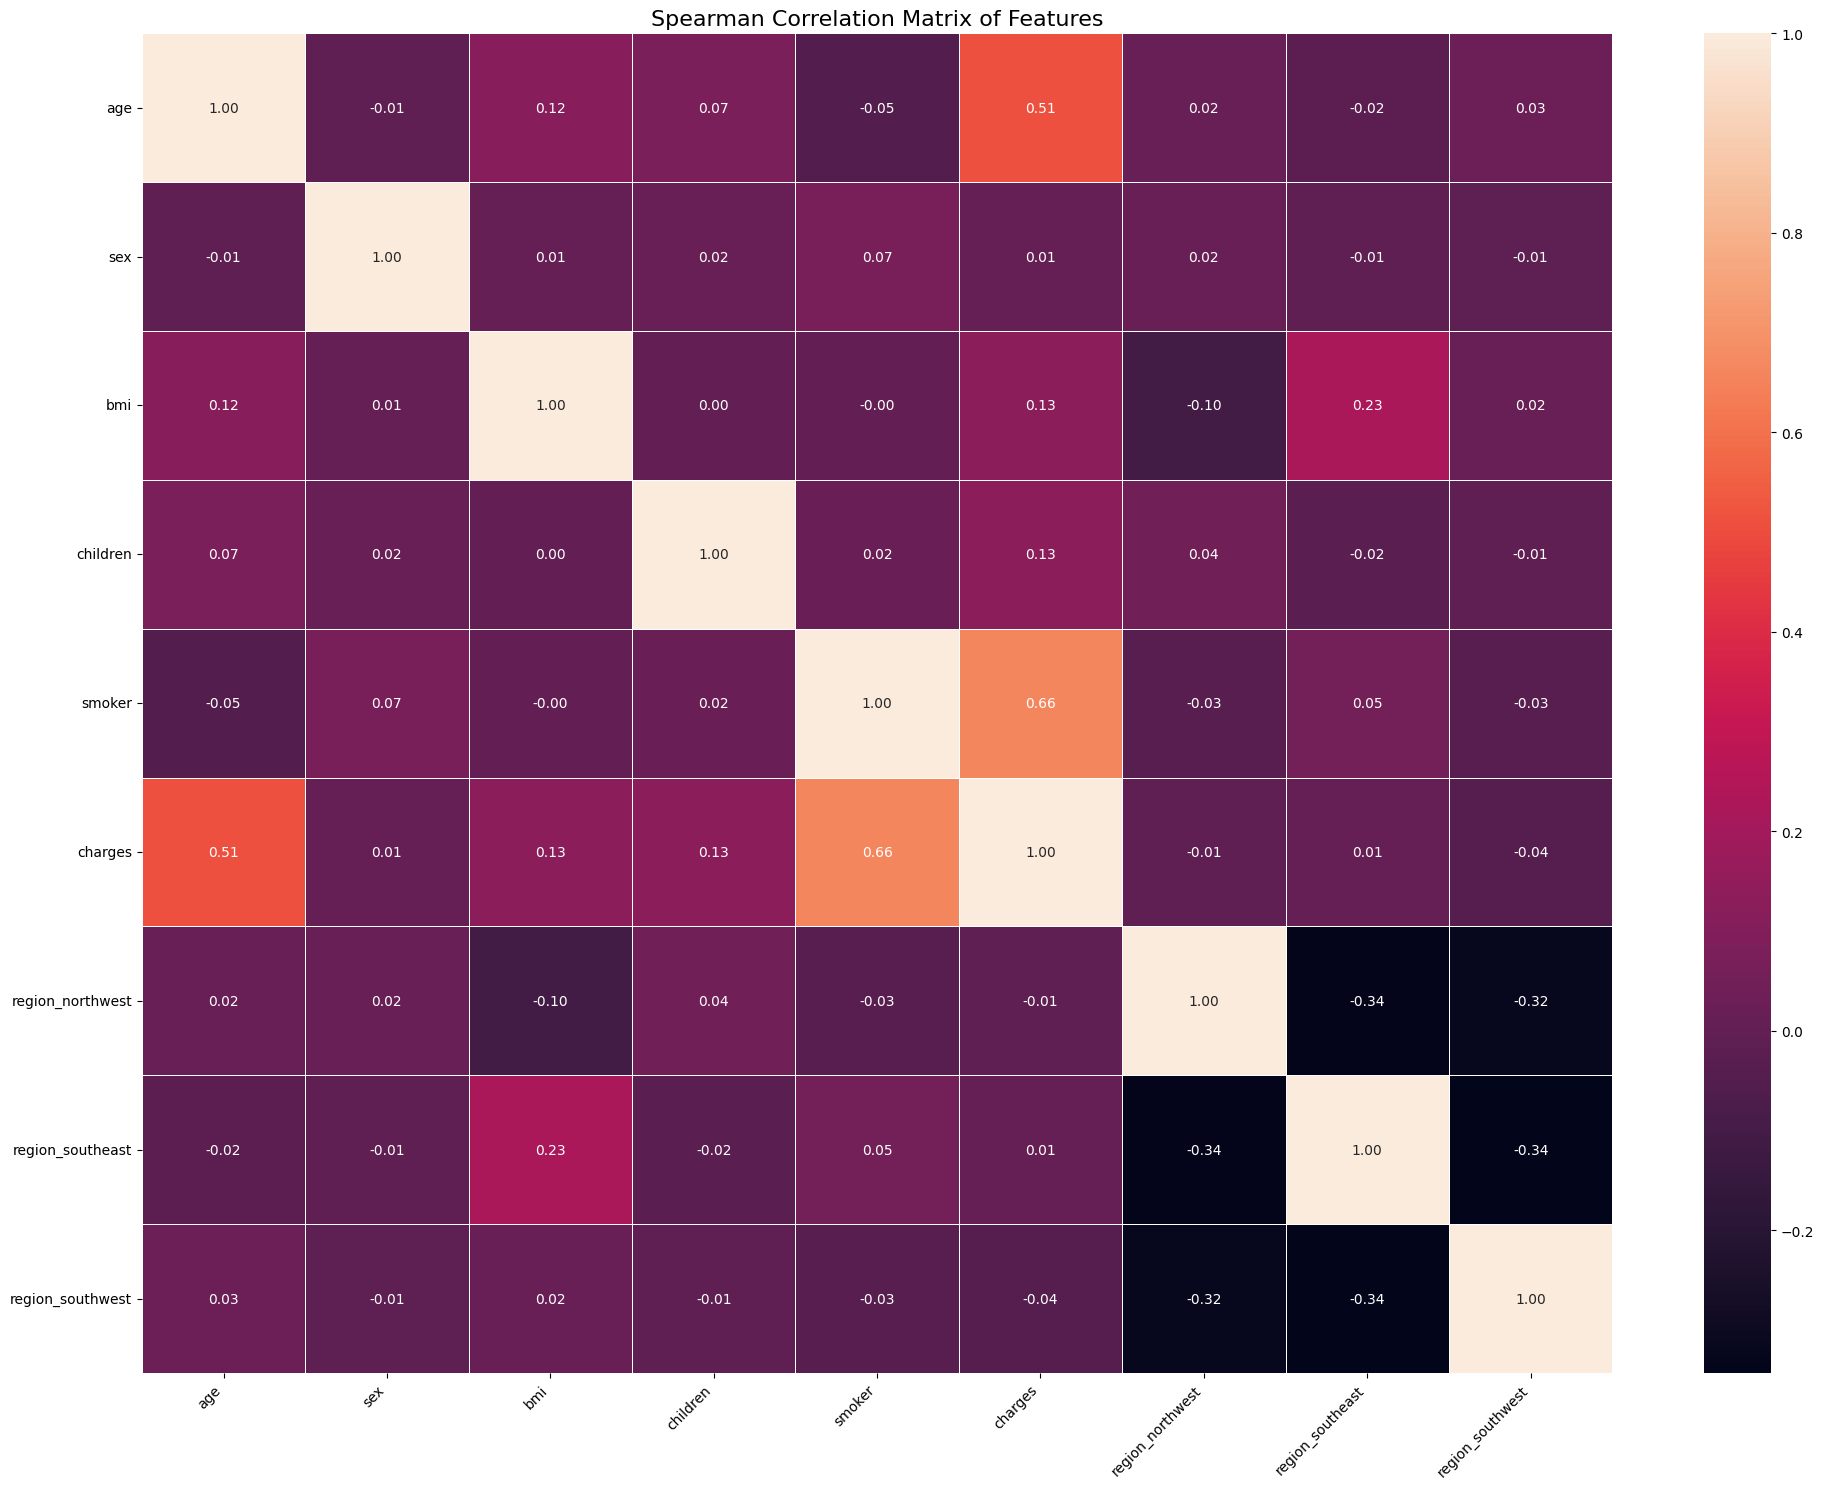


--- Interpretation of Spearman's Correlation ---
• Spearman's correlation coefficient ranges from -1 to 1.
• A value of 1 indicates a perfect monotonic increasing relationship (as one variable increases, the other also increases, but not necessarily at a constant rate).
• A value of -1 indicates a perfect monotonic decreasing relationship (as one variable increases, the other decreases).
• A value of 0 indicates no monotonic relationship.
• It's based on the ranks of the data values, not the raw values themselves, making it less sensitive to outliers and suitable for non-normally distributed data or ordinal scales.


In [13]:
# --- Visualize the Spearman Correlation Matrix using a Heatmap ---
plt.figure(figsize=(20, 15)) # Set the figure size for better readability
sns.heatmap(
    spearman_correlation_matrix,
    annot=True,      # Show the correlation values on the heatmap
    cmap='rocket',  # Colormap (e.g., 'viridis', 'plasma', 'magma', 'coolwarm')
    fmt=".2f",       # Format annotations to two decimal places
    linewidths=.5    # Add lines between cells
)
plt.title('Spearman Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("\n--- Interpretation of Spearman's Correlation ---")
print("• Spearman's correlation coefficient ranges from -1 to 1.")
print("• A value of 1 indicates a perfect monotonic increasing relationship (as one variable increases, the other also increases, but not necessarily at a constant rate).")
print("• A value of -1 indicates a perfect monotonic decreasing relationship (as one variable increases, the other decreases).")
print("• A value of 0 indicates no monotonic relationship.")
print("• It's based on the ranks of the data values, not the raw values themselves, making it less sensitive to outliers and suitable for non-normally distributed data or ordinal scales.")

## Distribution plot of target label


--- Distribution Plot of Charges ---


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


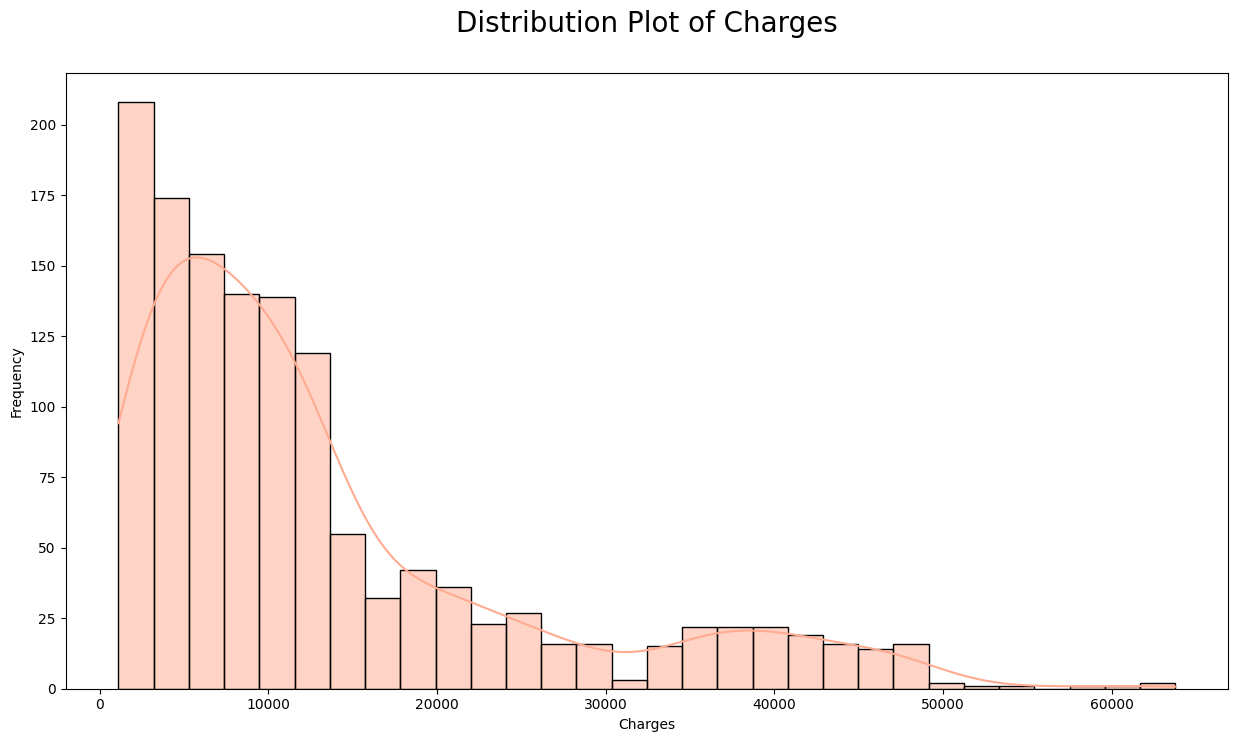

In [14]:
# --- Distribution plot of charges column ---
print("\n--- Distribution Plot of Charges ---")
plt.figure(figsize = (15, 8))
sns.histplot(df['charges'], kde=True, color='#FFAB91') # Using histplot with kde=True for distribution
plt.title('Distribution Plot of Charges\n', fontsize = 20)
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


--- Distribution Plot of Charges (Seaborn) ---


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

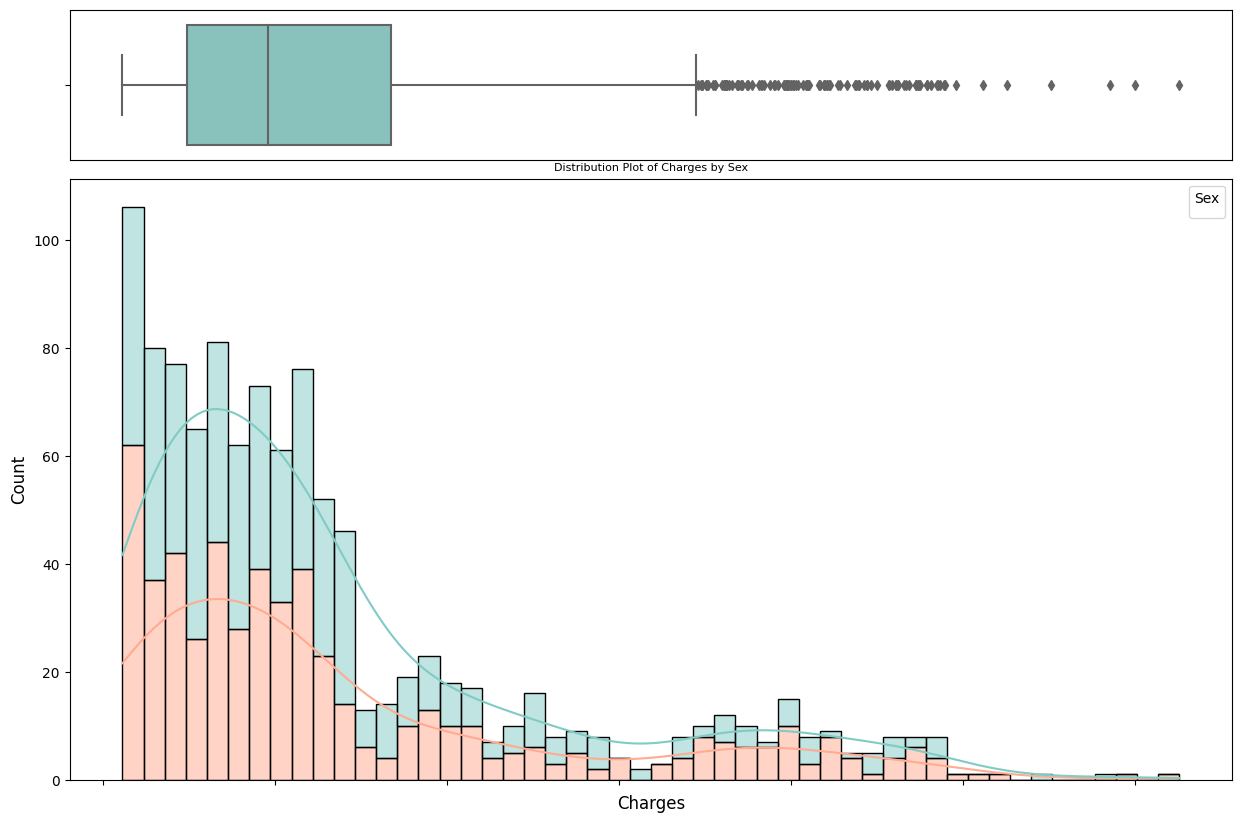

In [15]:
# --- Distribution plot of charges column using Seaborn (replacing Plotly Express) ---
print("\n--- Distribution Plot of Charges (Seaborn) ---")

# Create a figure and a set of subplots using gridspec for a combined plot
fig = plt.figure(figsize=(15, 10)) # Adjusted figure size for better layout as per user's request
gs = fig.add_gridspec(2, 1, height_ratios=[0.2, 0.8], hspace=0.05) # 2 rows, 1 column, top row smaller

ax_box = fig.add_subplot(gs[0, 0]) # Top subplot for box plot
ax_hist = fig.add_subplot(gs[1, 0], sharex=ax_box) # Bottom subplot for histogram, sharing x-axis

# Define a custom palette with the specified hex color codes (light teal/mint and salmon/peach)
custom_palette = ["#80CBC4", "#FFAB91"] # These hex codes approximate the colors in your provided images

# Plot marginal box plot, colored by 'sex'
sns.boxplot(data=train, x='charges', hue='sex', ax=ax_box, palette=custom_palette)
ax_box.set(xlabel='', xticklabels=[]) # Remove x-axis label and ticks for the box plot
ax_box.tick_params(axis='x', bottom=False) # Remove bottom ticks

# Plot histogram, colored by 'sex' and stacked
sns.histplot(data=train, x='charges', hue='sex', multiple='stack', kde=True, bins=50, ax=ax_hist, palette=custom_palette)
ax_hist.set_title('Distribution Plot of Charges by Sex', fontsize=8) # Title font size updated to 16 for visibility
ax_hist.set_xlabel('Charges', fontsize=12)
ax_hist.set_ylabel('Count', fontsize=12)
ax_hist.legend(title='Sex') # The legend clearly labels the 'sex' categories

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [16]:
train['smoker'].unique()

array(['no', 'yes'], dtype=object)

# Freature Engineer

In [17]:
train = train.drop(columns=['sex', 'region'], errors='ignore')
test = test.drop(columns=['sex', 'region'], errors='ignore')
train.head()

age    bmi  children smoker      charges
560    46  19.95         2     no   9193.83850
1285   47  24.32         0     no   8534.67180
1142   52  24.86         0     no  27117.99378
969    39  34.32         5     no   8596.82780
486    54  21.47         3     no  12475.35130

## Encode categorical column and data normalization

In [18]:
# --- Initialize the OneHotEncoder ---
# handle_unknown='ignore' will set unseen categories to all zeros, preventing errors.
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False returns a dense array

# --- Fit the encoder on the 'smoker' column of the TRAINING data only ---
# fit on train_df[['smoker']] (note the double brackets to keep it as a DataFrame)
encoder.fit(train[['smoker']])

# --- Transform the 'smoker' column in both TRAINING and TEST datasets ---

# Transform training data
smoker_encoded_train = encoder.transform(train[['smoker']])
# Create a DataFrame from the encoded array with appropriate column names
# encoder.get_feature_names_out() provides names like 'smoker_no', 'smoker_yes'
smoker_df_train = pd.DataFrame(smoker_encoded_train, columns=encoder.get_feature_names_out(['smoker']), index=train.index)

# Transform test data
smoker_encoded_test = encoder.transform(test[['smoker']])
# Create a DataFrame from the encoded array with appropriate column names
smoker_df_test = pd.DataFrame(smoker_encoded_test, columns=encoder.get_feature_names_out(['smoker']), index=test.index)

# --- Drop the original 'smoker' column and concatenate the new encoded columns ---

# For training data
train = train.drop('smoker', axis=1)
train = pd.concat([train, smoker_df_train], axis=1)

# For test data
test = test.drop('smoker', axis=1)
test = pd.concat([test, smoker_df_test], axis=1)

# --- Standard Scale numerical columns ---
# Identify numerical columns (excluding the newly created smoker_no/smoker_yes and the target 'charges')
numerical_cols = ['age', 'bmi', 'children'] # Assuming these are your numerical features

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical columns of the TRAINING data only
scaler.fit(train[numerical_cols])

# Define y_scaler if not already defined
y_scaler = StandardScaler()
y_scaler.fit(train[['charges']])  # Fit only on the charges column
train['charges'] = y_scaler.transform(train[['charges']])
test['charges'] = y_scaler.transform(test[['charges']])
# Transform numerical columns in both TRAINING and TEST datasets
train[numerical_cols] = scaler.transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])
train

age       bmi  children   charges  smoker_no  smoker_yes
560   0.472227 -1.756525  0.734336 -0.345621        1.0         0.0
1285  0.543313 -1.033082 -0.911192 -0.400488        1.0         0.0
1142  0.898745 -0.943687 -0.911192  1.146332        1.0         0.0
969  -0.025379  0.622393  3.202629 -0.395314        1.0         0.0
486   1.040918 -1.504893  1.557100 -0.072478        1.0         0.0
...        ...       ...       ...       ...        ...         ...
1095 -1.518194  0.130717  2.379865 -0.731229        1.0         0.0
1130 -0.025379 -1.107579  3.202629 -0.396523        1.0         0.0
1294  1.325264 -0.891539 -0.911192 -0.117777        1.0         0.0
860  -0.167551  2.820864  0.734336  2.727461        0.0         1.0
1126  1.112004 -0.109327 -0.911192 -0.260653        1.0         0.0

[1070 rows x 6 columns]

## Split features and target label

In [19]:
x_train = train.drop('charges', axis=1) 
y_train = train['charges'] 
x_test = test.drop('charges', axis=1) 
y_test = test['charges'] 

# Print the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1070, 5)
y_train shape: (1070,)
X_test shape: (268, 5)
y_test shape: (268,)


## Dimensionality reduction

In [20]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

## Visualize data after dimensionality reduction

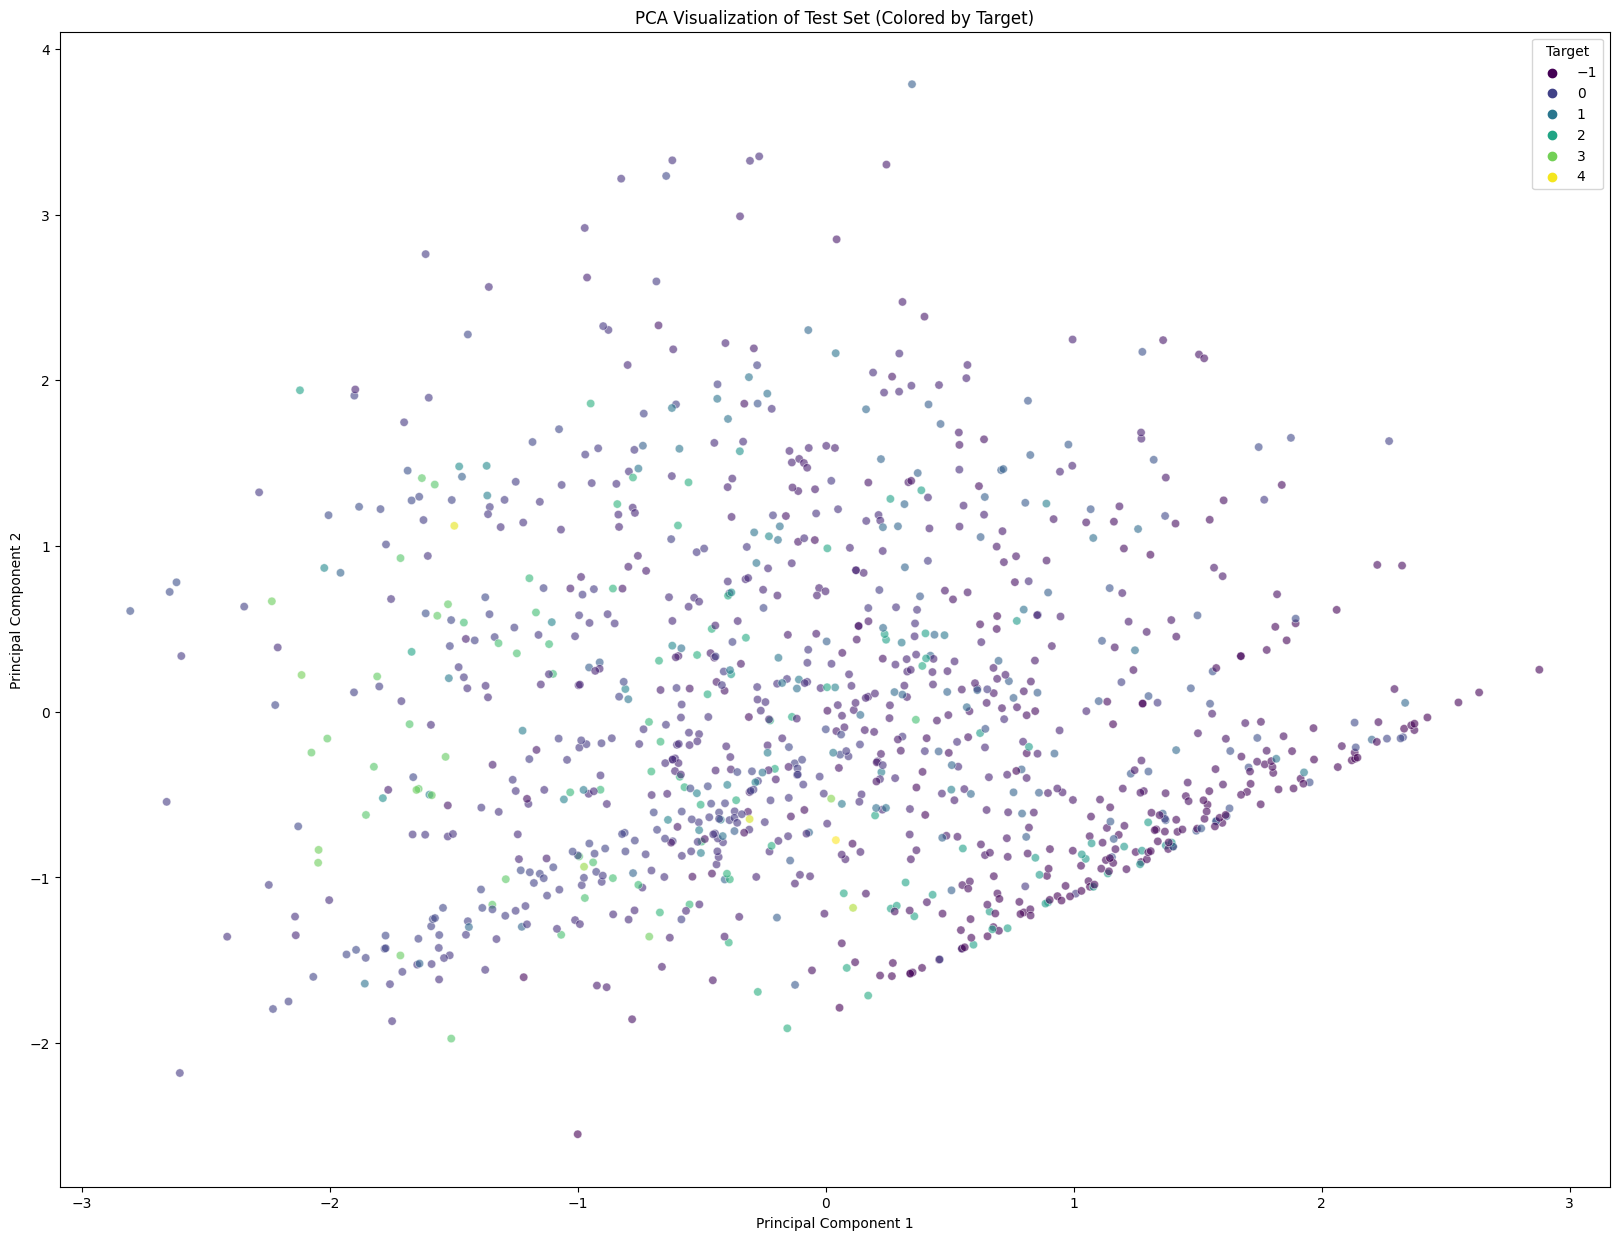

In [21]:
# --- Visualize the PCA-transformed data ---

# Create a DataFrame for the test set PCA components
plot_data = pd.DataFrame({
    'PC1': x_train[:, 0],  # First principal component
    'PC2': x_train[:, 1],  # Second principal component
    'Target': y_train         # Target variable for coloring
})

# Create the scatter plot
plt.figure(figsize=(20, 15))
sns.scatterplot(
    data=plot_data,
    x="PC1",
    y="PC2",
    hue="Target",  # Color by target variable (e.g., charges)
    palette="viridis",  # Continuous palette for charges
    alpha=0.6  # Slight transparency for overlapping points
)

# Set labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Test Set (Colored by Target)")

# Optionally add a regression line (if desired)
# sns.regplot(data=plot_data, x="PC1", y="PC2", scatter=False, color="blue")

# Show the plot
plt.show()

# Modeling

## Model Architecture, model building (Keras), and model training

In [22]:
# --- Custom Loss Function and Metric Functions (REMOVED as per request) ---
# The custom functions custom_mse_loss, custom_mae, custom_mse are removed.

# --- Define the Perceptron Model using Keras Sequential API (for Regression) ---
# A simple perceptron for regression consists of a single Dense layer.

# Determine input dimension based on the training data (after PCA)
input_dim = x_train.shape[1] # Use X_train_pca as the input to the model

model = keras.Sequential([
    # Output Dense layer with 1 neuron for regression (linear activation by default).
    # This single layer acts as the perceptron.
    layers.Dense(1, input_shape=(input_dim,), name='output_layer')
])

print("\n--- Model Architecture (Perceptron) ---")
model.summary()
total_params = model.count_params()
print(f"Number of trainable parameters: {total_params}")


# --- Compile the Model ---
# For regression, 'mean_squared_error' (MSE) is a suitable loss function.
# 'adam' is a good general-purpose optimizer.
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), # Consistent learning rate
              loss='mean_squared_error', # Use built-in MSE loss function
              metrics=['mean_absolute_error', 'mean_squared_error']) # Use built-in MAE and MSE metrics

# --- Implement Early Stopping Callback ---
early_stopping_patience = 8 # Consistent with PyTorch example
early_stopping_callback = EarlyStopping(
    monitor='val_loss',     # Monitor validation loss
    patience=early_stopping_patience, # Number of epochs with no improvement after which training will be stopped.
    restore_best_weights=True, # Restore model weights from the epoch with the best value of the monitored quantity.
    verbose=1               # Show messages when early stopping is triggered
)

# --- Train the Model ---
epochs = 100 # Consistent with PyTorch example
print("\n--- Training Model ---")

history = model.fit(
    x_train, y_train, # Use PCA-transformed features and scaled target
    epochs=epochs,
    validation_split=0.2, # Use 20% of training data for validation
    callbacks=[early_stopping_callback], # Apply early stopping
    verbose=1 # Show training progress
)

print("\nTraining complete.")


--- Model Architecture (Perceptron) ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-24 14:56:24.589867: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ output_layer (Dense)            │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Number of trainable parameters: 3

--- Training Model ---
Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2808 - mean_absolute_error: 1.1850 - mean_squared_error: 2.2808 - val_loss: 2.4915 - val_mean_absolute_error: 1.2202 - val_mean_squared_error: 2.4915
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1702 - mean_absolute_error: 1.1387 - mean_squared_error: 2.1702 - val_loss: 2.4228 - val_mean_absolute_error: 1.2018 - val_mean_squared_error: 2.4228
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1602 - mean_absolute_error: 1.1586 - mean_squared_error: 2.1602 - val_loss: 2.3551 - val_mean_absolute_error: 1.1835 - val_mean_squared_error: 2.3551
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1746 - mean_absolute_error: 1.1397 - mean_squared_error: 2.1746 - val_loss: 2.2889 - val_mean_absolute_error: 1.1656 - val_mean_squared_error: 2.2889
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9128 - mean_absolute_error: 1.0717 -

## Plotting Training History (Loss)


Training complete.


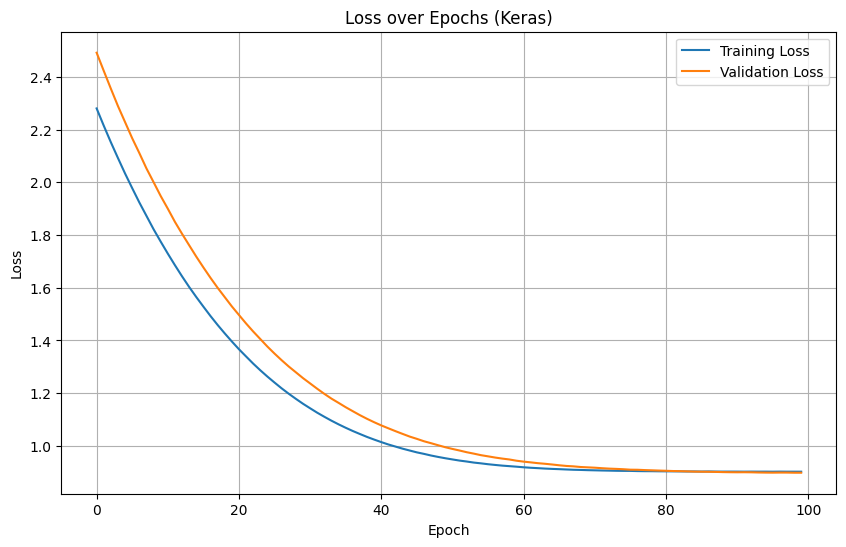

In [23]:
print("\nTraining complete.")

# --- Plotting Training History (Loss) ---
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs (Keras)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Visualize the Regression Hypersurfaces


--- Visualizing Regression Prediction Surface ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


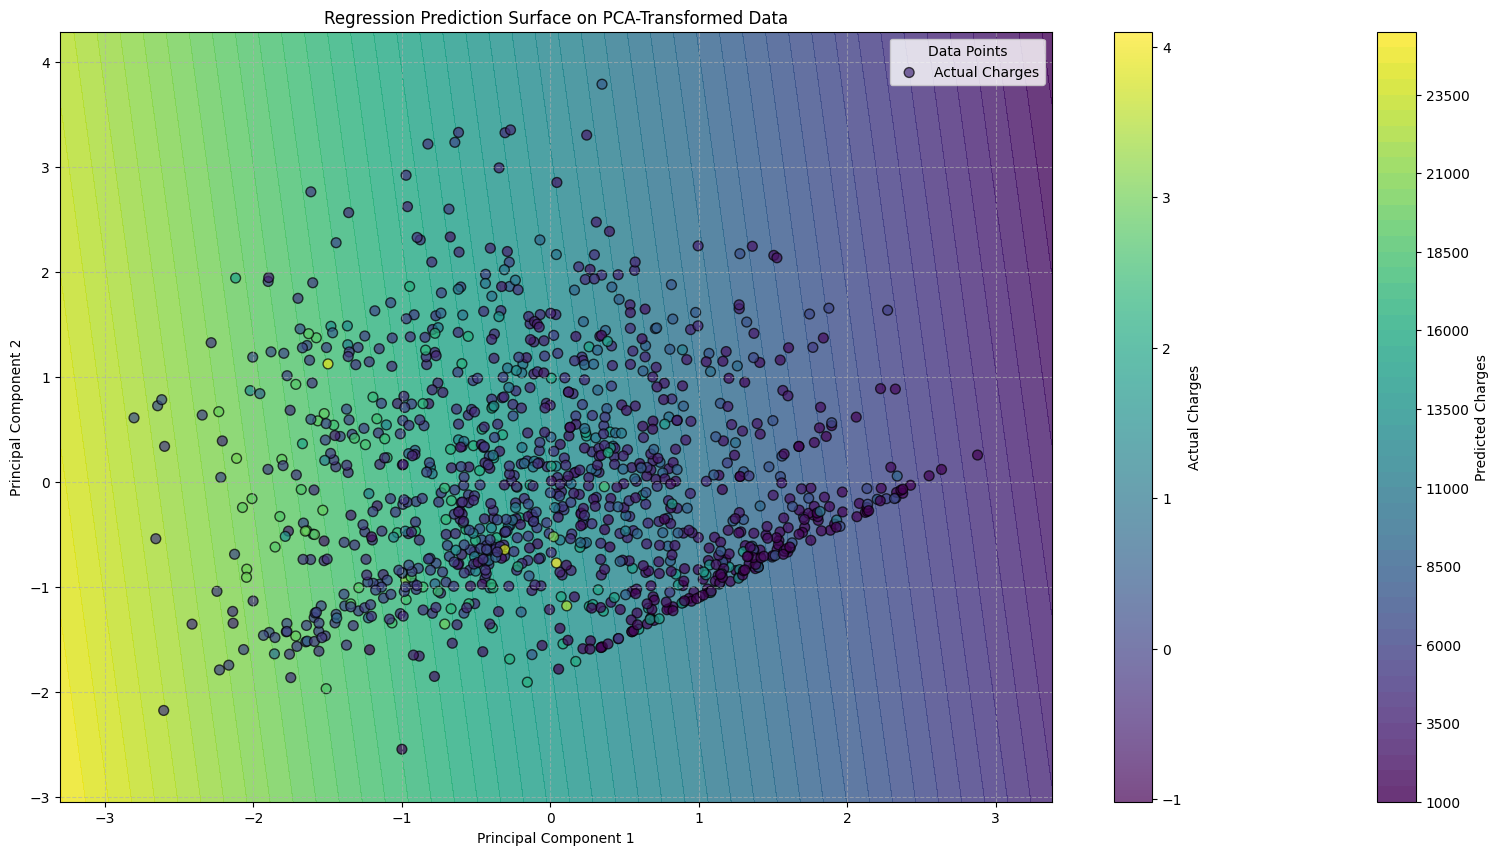

In [24]:
# --- Visualize the Regression Prediction Surface ---
# This replaces the "Decision Boundary" plot for classification
print("\n--- Visualizing Regression Prediction Surface ---")

# Create a meshgrid over the 2D PCA feature space
# Use X_train_pca to define the min/max for the meshgrid
x_min, x_max = x_train[:, 0].min() - 0.5, x_train[:, 0].max() + 0.5
y_min, y_max = x_train[:, 1].min() - 0.5, x_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare meshgrid for Keras model prediction
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
# No need for torch.tensor, directly use numpy array for Keras predict

# Get continuous predictions from the model
# Keras model.predict automatically handles batching and returns numpy array
Z_predicted_scaled = model.predict(meshgrid_points).flatten()

# Inverse transform the scaled predictions back to original scale
Z_predicted_original = y_scaler.inverse_transform(Z_predicted_scaled.reshape(-1, 1)).flatten()
Z_predicted = Z_predicted_original.reshape(xx.shape)

plt.figure(figsize=(20, 10))

# Plot the predicted values as a filled contour map
contour = plt.contourf(xx, yy, Z_predicted, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='Predicted Charges')

# Overlay the actual training data points, colored by their true charges (original scale)
scatter = plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis', edgecolors='k', s=50, alpha=0.7, label='Actual Charges')
plt.colorbar(scatter, label='Actual Charges')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Regression Prediction Surface on PCA-Transformed Data")
plt.legend(title="Data Points")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



--- Visualizing Regression Prediction Surface (3D) ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


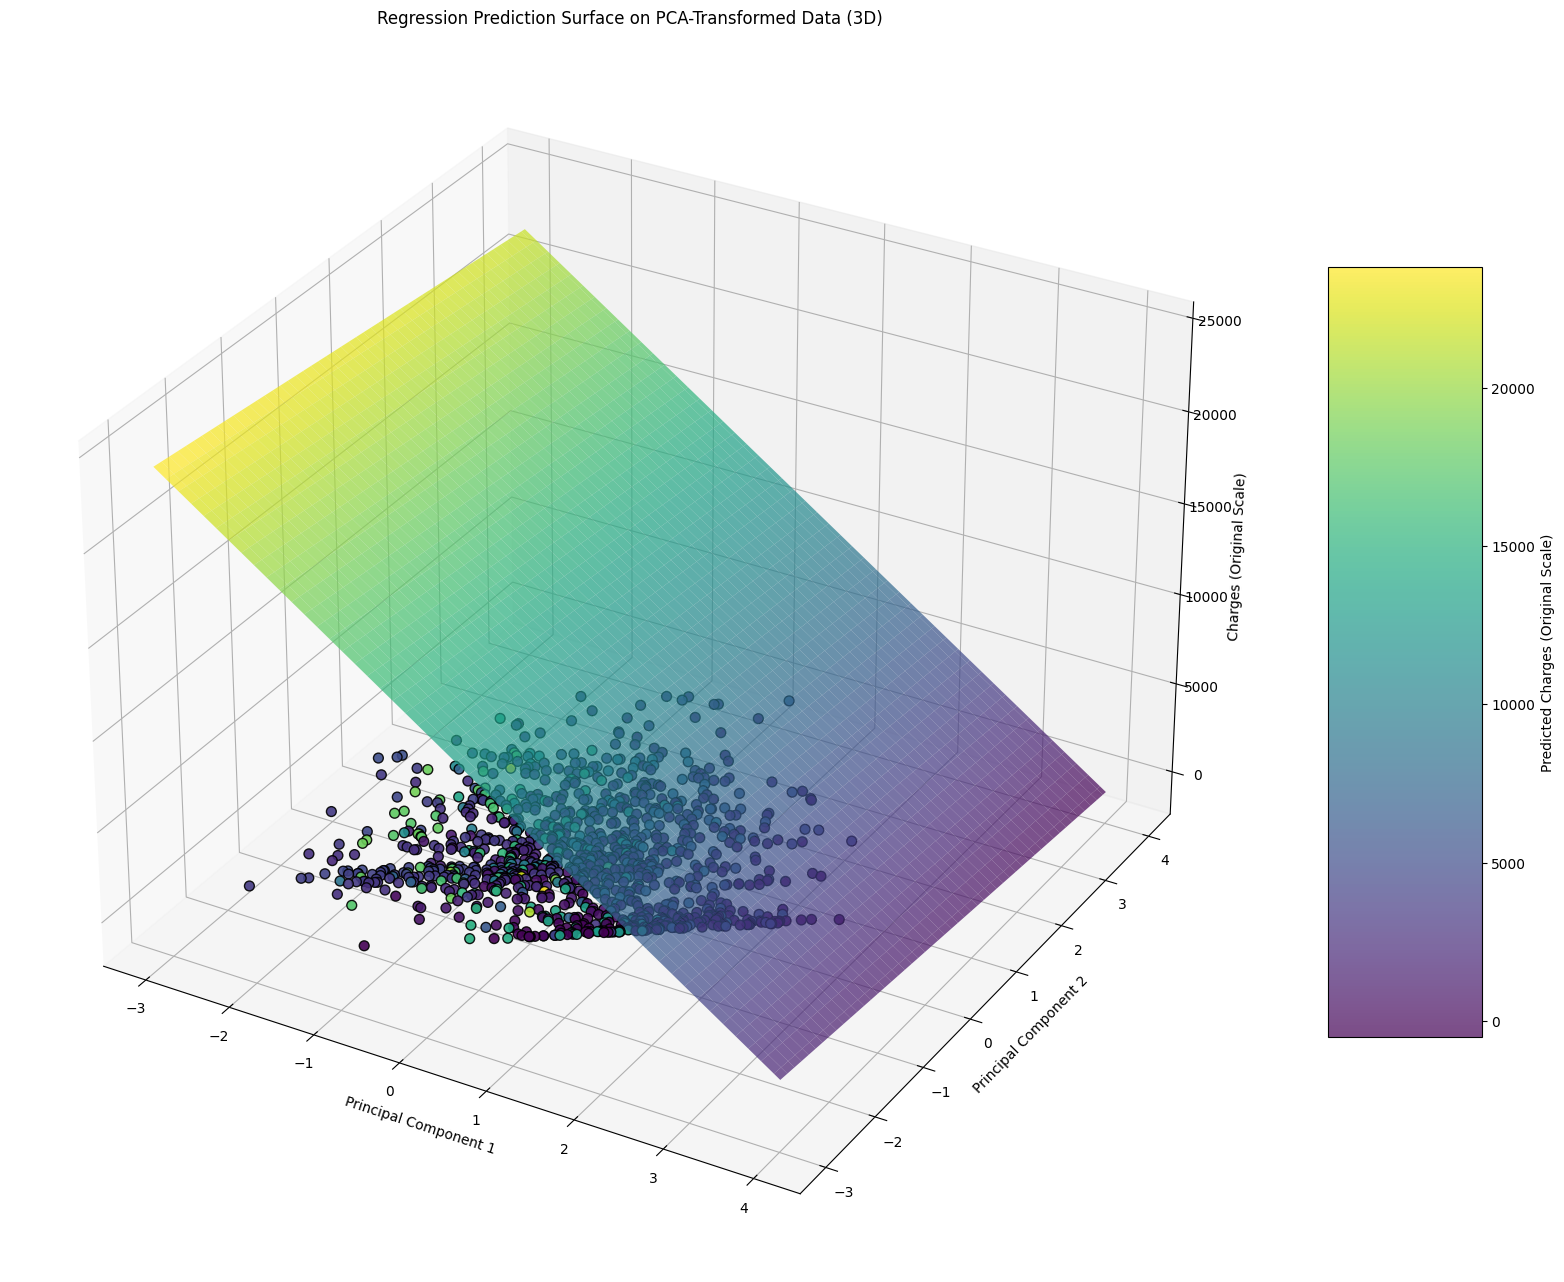

In [25]:
# --- Visualize the Regression Prediction Surface (3D) ---
print("\n--- Visualizing Regression Prediction Surface (3D) ---")

# Create a meshgrid over the 2D PCA feature space with range matching the reference image (-3 to 4)
x_min, x_max = -3.0, 4.0  # Adjusted to match the reference image range
y_min, y_max = -3.0, 4.0  # Adjusted to match the reference image range
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare meshgrid for Keras model prediction
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
# No need for torch.tensor, directly use numpy array for Keras predict

# Get continuous predictions from the model
# Keras model.predict automatically handles batching and returns numpy array
Z_predicted_scaled = model.predict(meshgrid_points).flatten()

# Inverse transform the predicted Z values to original scale for plotting
Z_predicted = y_scaler.inverse_transform(Z_predicted_scaled.reshape(-1, 1)).reshape(xx.shape)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d') # Create a 3D subplot

# Plot the predicted values as a surface
surface = ax.plot_surface(xx, yy, Z_predicted, cmap='viridis', alpha=0.7)
fig.colorbar(surface, shrink=0.5, aspect=5, label='Predicted Charges (Original Scale)')

# Overlay the actual training data points, colored by their true charges (original scale)
# Use y_train_raw directly as it's the original unscaled target values for the training set
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, c=y_train, cmap='viridis', edgecolors='k', s=50, alpha=0.9, label='Actual Charges')

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Charges (Original Scale)") # Z-axis label for regression output
ax.set_title("Regression Prediction Surface on PCA-Transformed Data (3D)")
# ax.legend() # Legend might not work well in 3D; consider manual labeling if needed
plt.show()

## Model Architecture, model building (TF custom function), and model training

In [26]:
# --- Custom Loss Function ---
def custom_mse_loss(y_true, y_pred):
    """
    Custom Mean Squared Error (MSE) loss function.
    Calculates the mean of the squared differences between true and predicted values.
    """
    return tf.reduce_mean(tf.square(y_true - y_pred))

# --- Custom Metric Functions ---
def custom_mae(y_true, y_pred):
    """
    Custom Mean Absolute Error (MAE) metric function.
    Calculates the mean of the absolute differences between true and predicted values.
    """
    return tf.reduce_mean(tf.abs(y_true - y_pred))

def custom_mse(y_true, y_pred):
    """
    Custom Mean Squared Error (MSE) metric function.
    Calculates the mean of the squared differences between true and predicted values.
    """
    return tf.reduce_mean(tf.square(y_true - y_pred))

# --- Custom Perceptron Layer ---
class CustomPerceptron(layers.Layer):
    """
    A custom Keras Layer implementing a simple perceptron (single neuron).
    It performs a linear transformation: output = inputs * weights + bias.
    """
    def __init__(self, units=1, **kwargs):
        super(CustomPerceptron, self).__init__(**kwargs)
        self.units = units # Number of output units (neurons)

    def build(self, input_shape):
        """
        Creates the layer's weights and biases.
        input_shape: Shape of the input tensor (e.g., (None, input_dim)).
        """
        # Weights for the linear transformation
        self.w = self.add_weight(
            name='kernel',
            shape=(input_shape[-1], self.units), # input_dim x units
            initializer='random_normal', # Initialize weights randomly
            trainable=True # These weights should be learned during training
        )
        # Bias for the linear transformation
        self.b = self.add_weight(
            name='bias',
            shape=(self.units,), # units
            initializer='zeros', # Initialize biases to zeros
            trainable=True # These biases should be learned during training
        )
        super(CustomPerceptron, self).build(input_shape) # Call the super build method

    def call(self, inputs):
        """
        Defines the layer's forward pass (computation logic).
        inputs: The input tensor to the layer.
        """
        # Perform the linear transformation: inputs * weights + bias
        return tf.matmul(inputs, self.w) + self.b

    def get_config(self):
        """
        Returns the config of the layer. This is necessary for saving/loading models
        that contain custom layers.
        """
        config = super(CustomPerceptron, self).get_config()
        config.update({"units": self.units})
        return config


# --- Define the Perceptron Model using Keras Sequential API with Custom Layer (for Regression) ---
# A simple perceptron for regression consists of a single Dense layer.

# Determine input dimension based on the training data (after PCA)
input_dim = x_train.shape[1] # Use X_train_pca as the input to the model

model = keras.Sequential([
    # Use the custom perceptron layer as the output layer
    CustomPerceptron(units=1, input_shape=(input_dim,), name='custom_perceptron_output')
])

print("\n--- Model Architecture (Perceptron with Custom Layer) ---")
model.summary()
total_params = model.count_params()
print(f"Number of trainable parameters: {total_params}")


# --- Compile the Model ---
# For regression, 'mean_squared_error' (MSE) is a suitable loss function.
# 'adam' is a good general-purpose optimizer.
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), # Consistent learning rate
              loss=custom_mse_loss, # Use custom MSE loss function
              metrics=[custom_mae, custom_mse]) # Use custom MAE and MSE metrics

# --- Implement Early Stopping Callback ---
early_stopping_patience = 8 # Consistent with PyTorch example
early_stopping_callback = EarlyStopping(
    monitor='val_loss',     # Monitor validation loss (which is custom_mse_loss here)
    patience=early_stopping_patience, # Number of epochs with no improvement after which training will be stopped.
    restore_best_weights=True, # Restore model weights from the epoch with the best value of the monitored quantity.
    verbose=1               # Show messages when early stopping is triggered
)

# --- Train the Model ---
epochs = 100 # Consistent with PyTorch example
print("\n--- Training Model ---")

history = model.fit(
    x_train, y_train, # Use PCA-transformed features and scaled target
    epochs=epochs,
    validation_split=0.2, # Use 20% of training data for validation
    callbacks=[early_stopping_callback], # Apply early stopping
    verbose=1 # Show training progress
)

print("\nTraining complete.")


--- Model Architecture (Perceptron with Custom Layer) ---


/tmp/ipykernel_13/2489917608.py:31: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(CustomPerceptron, self).__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_perceptron_output        │ (None, 1)              │             3 │
│ (CustomPerceptron)              │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Number of trainable parameters: 3

--- Training Model ---
Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - custom_mae: 0.7604 - custom_mse: 1.0199 - loss: 1.0199 - val_custom_mae: 0.7498 - val_custom_mse: 0.9940 - val_loss: 0.9968
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - custom_mae: 0.7568 - custom_mse: 0.9667 - loss: 0.9668 - val_custom_mae: 0.7496 - val_custom_mse: 0.9795 - val_loss: 0.9830
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - custom_mae: 0.7520 - custom_mse: 0.9302 - loss: 0.9303 - val_custom_mae: 0.7461 - val_custom_mse: 0.9653 - val_loss: 0.9692
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - custom_mae: 0.7302 - custom_mse: 0.8795 - loss: 0.8795 - val_custom_mae: 0.7443 - val_custom_mse: 0.9544 - val_loss: 0.9588
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - custom_mae: 0.7538 - custom_mse: 0.9224 - loss: 0.9225 - val_custom_mae: 0.7447 - val_custom_mse: 0.9447 - val_loss: 0.9496
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - cus

## Plotting Training History (Loss)

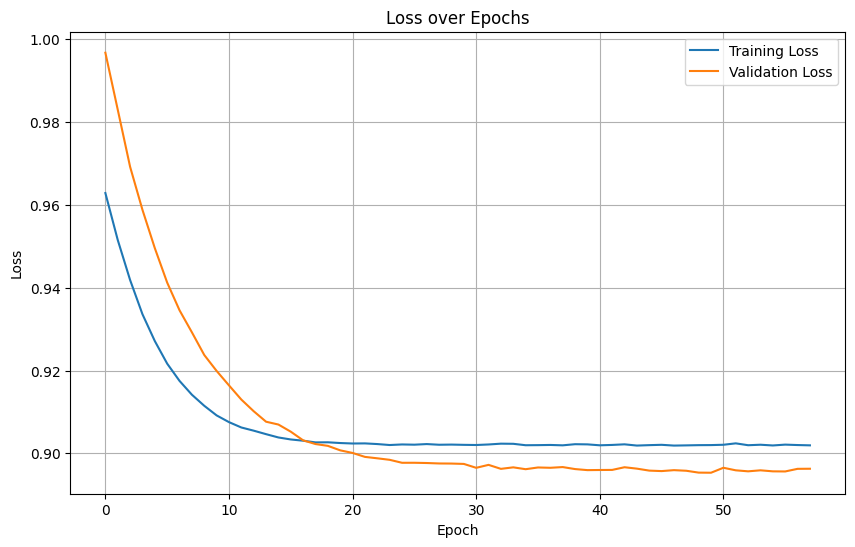

In [27]:
# --- Plotting Training History (Loss) ---
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Visualize the Regression Hypersurfaces


--- Visualizing Regression Prediction Surface ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step


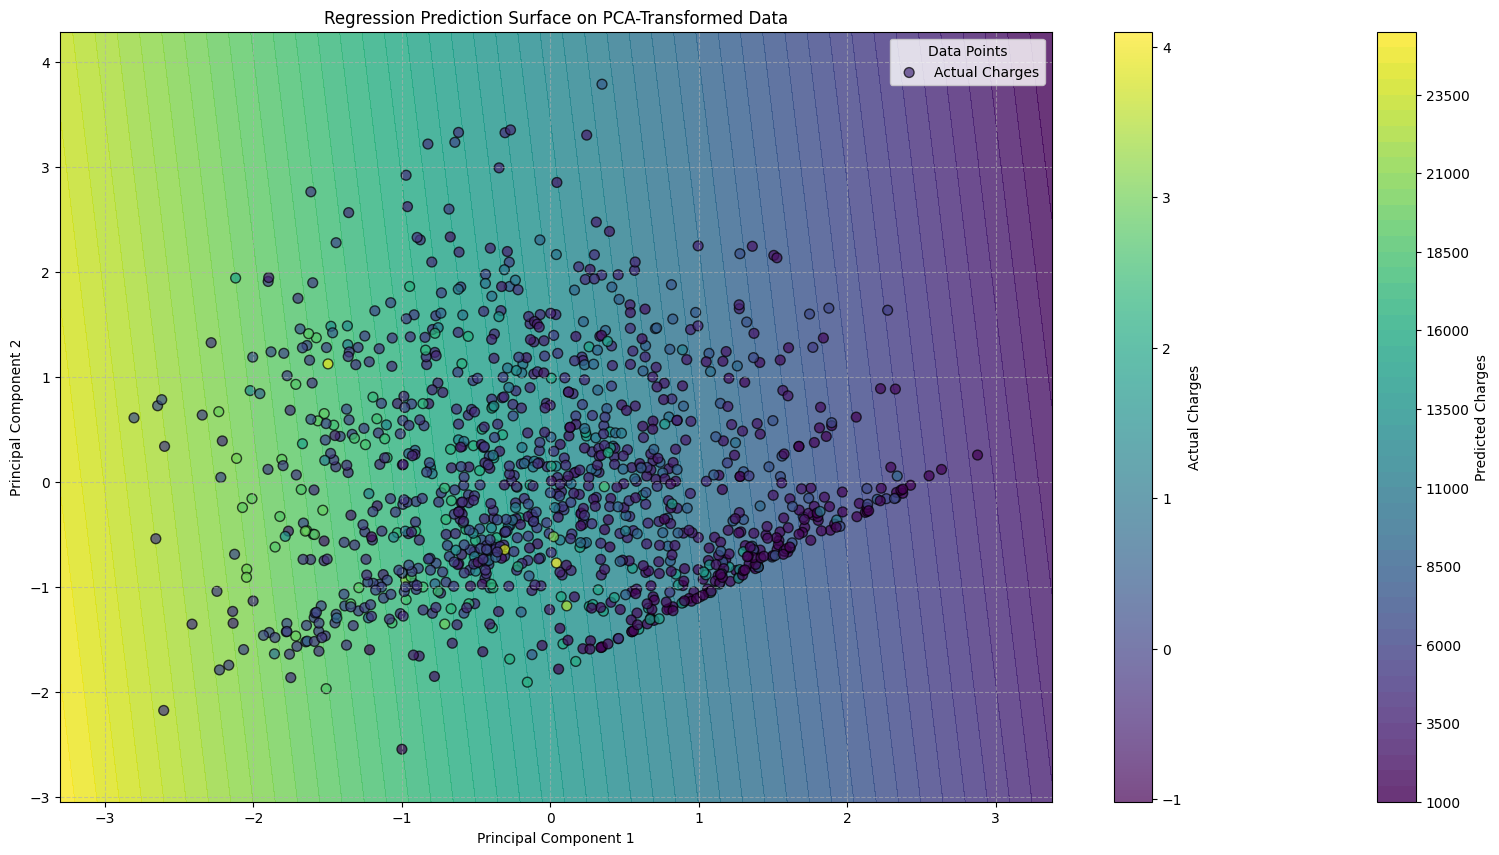

In [28]:
# --- Visualize the Regression Prediction Surface ---
# This replaces the "Decision Boundary" plot for classification
print("\n--- Visualizing Regression Prediction Surface ---")

# Create a meshgrid over the 2D PCA feature space
# Use X_train_pca to define the min/max for the meshgrid
x_min, x_max = x_train[:, 0].min() - 0.5, x_train[:, 0].max() + 0.5
y_min, y_max = x_train[:, 1].min() - 0.5, x_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare meshgrid for Keras model prediction
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
# No need for torch.tensor, directly use numpy array for Keras predict

# Get continuous predictions from the model
# Keras model.predict automatically handles batching and returns numpy array
Z_predicted_scaled = model.predict(meshgrid_points).flatten()

# Inverse transform the scaled predictions back to original scale
Z_predicted_original = y_scaler.inverse_transform(Z_predicted_scaled.reshape(-1, 1)).flatten()
Z_predicted = Z_predicted_original.reshape(xx.shape)

plt.figure(figsize=(20, 10))

# Plot the predicted values as a filled contour map
contour = plt.contourf(xx, yy, Z_predicted, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='Predicted Charges')

# Overlay the actual training data points, colored by their true charges (original scale)
scatter = plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='viridis', edgecolors='k', s=50, alpha=0.7, label='Actual Charges')
plt.colorbar(scatter, label='Actual Charges')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Regression Prediction Surface on PCA-Transformed Data")
plt.legend(title="Data Points")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



--- Visualizing Regression Prediction Surface (3D) ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step


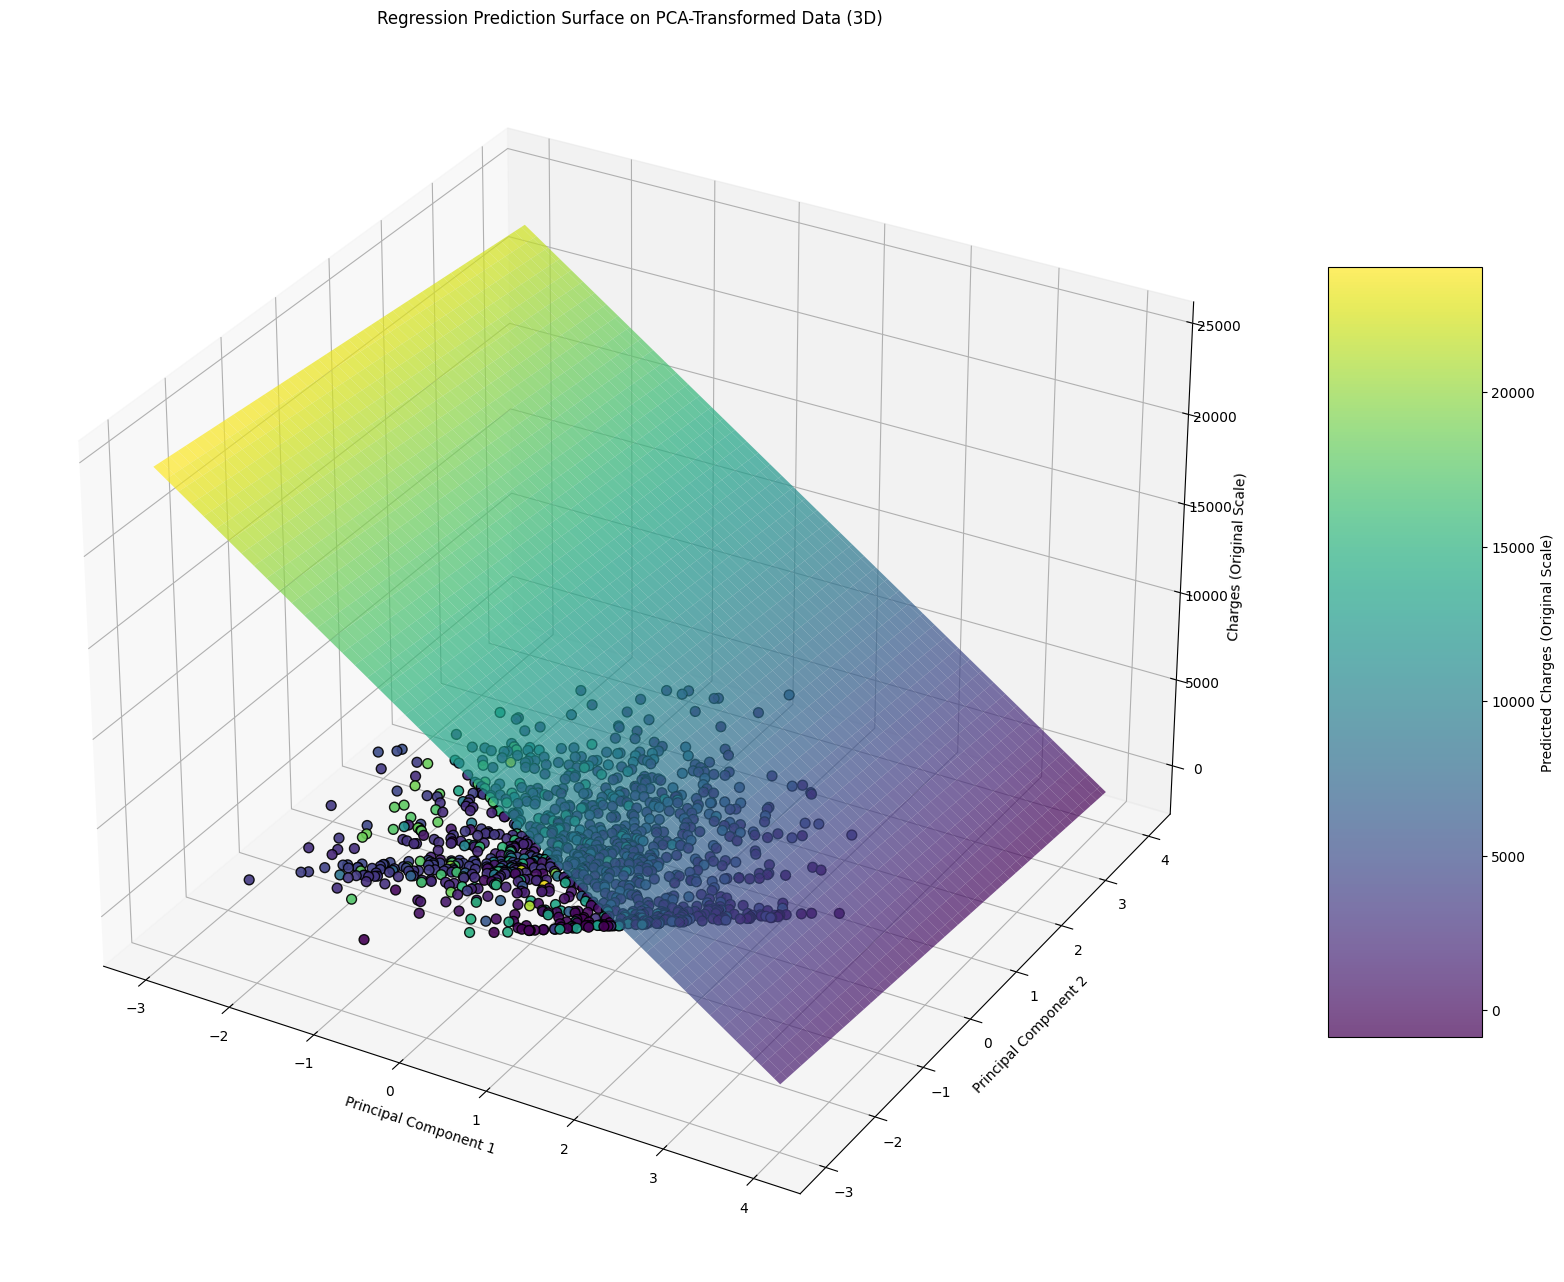

In [29]:
# --- Visualize the Regression Prediction Surface (3D) ---
print("\n--- Visualizing Regression Prediction Surface (3D) ---")

# Create a meshgrid over the 2D PCA feature space with range matching the reference image (-3 to 4)
x_min, x_max = -3.0, 4.0  # Adjusted to match the reference image range
y_min, y_max = -3.0, 4.0  # Adjusted to match the reference image range
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare meshgrid for Keras model prediction
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
# No need for torch.tensor, directly use numpy array for Keras predict

# Get continuous predictions from the model
# Keras model.predict automatically handles batching and returns numpy array
Z_predicted_scaled = model.predict(meshgrid_points).flatten()

# Inverse transform the predicted Z values to original scale for plotting
Z_predicted = y_scaler.inverse_transform(Z_predicted_scaled.reshape(-1, 1)).reshape(xx.shape)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d') # Create a 3D subplot

# Plot the predicted values as a surface
surface = ax.plot_surface(xx, yy, Z_predicted, cmap='viridis', alpha=0.7)
fig.colorbar(surface, shrink=0.5, aspect=5, label='Predicted Charges (Original Scale)')

# Overlay the actual training data points, colored by their true charges (original scale)
# Use y_train_raw directly as it's the original unscaled target values for the training set
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, c=y_train, cmap='viridis', edgecolors='k', s=50, alpha=0.9, label='Actual Charges')

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Charges (Original Scale)") # Z-axis label for regression output
ax.set_title("Regression Prediction Surface on PCA-Transformed Data (3D)")
# ax.legend() # Legend might not work well in 3D; consider manual labeling if needed
plt.show()

# Model Evaluation

## Evalute model on Regrression Metric (MSE)

In [30]:
# --- Metrics Calculation for Regression on Test Data ---
print(f"\n--- Regression Metrics on Test Data ---")

# Make predictions on the PCA-transformed test data
# X_test_pca is already a NumPy array, no need for torch.tensor
y_pred_test_scaled = model.predict(x_test).flatten()

# Inverse transform the scaled predictions back to original scale
y_pred_test_original = y_scaler.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()

# Use the original y_test_raw for comparison, as it's the unscaled target
y_test_original = y_test.values.flatten() # Ensure y_test_raw is a numpy array and flattened

mse = mean_squared_error(y_test_original, y_pred_test_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred_test_original)
mae = mean_absolute_error(y_test_original, y_pred_test_original) # Calculate MAE

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print("-" * 30)


--- Regression Metrics on Test Data ---
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 194433266.8115
Root Mean Squared Error (RMSE): 13943.9330
Mean Absolute Error (MAE): 13489.4734
R-squared (R2): -180763199.7910
------------------------------


## Visualize the Regression Hypersurfaces on test dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step


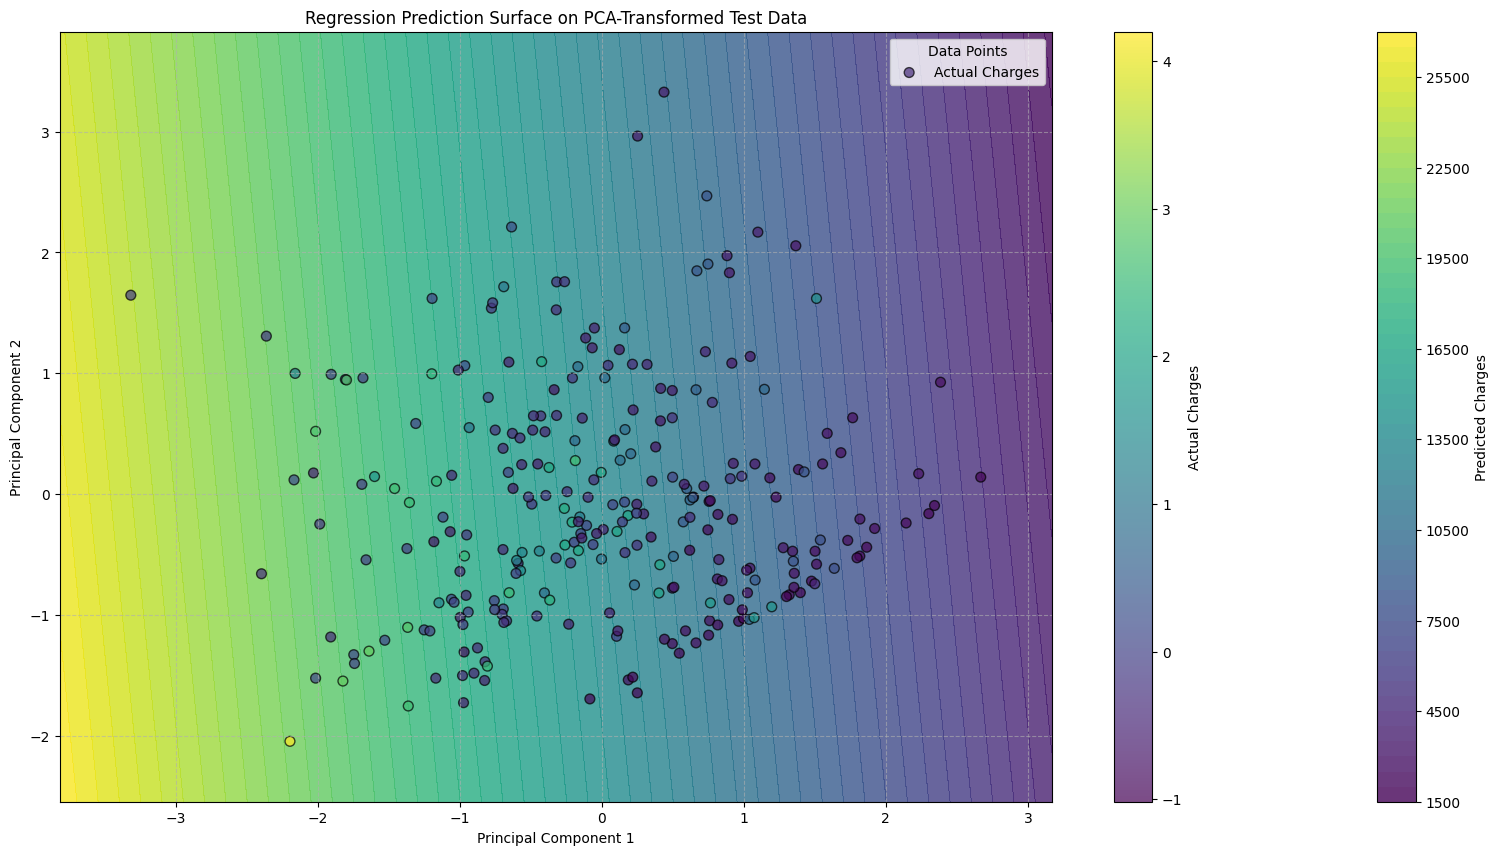

In [31]:
# Create a meshgrid over the 2D PCA feature space
# Use X_test_pca to define the min/max for the meshgrid, as requested
x_min, x_max = x_test[:, 0].min() - 0.5, x_test[:, 0].max() + 0.5
y_min, y_max = x_test[:, 1].min() - 0.5, x_test[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare meshgrid for Keras model prediction
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
# No need for torch.tensor, directly use numpy array for Keras predict

# Get continuous predictions from the model
# Keras model.predict automatically handles batching and returns numpy array
Z_predicted_scaled = model.predict(meshgrid_points).flatten()

# Inverse transform the scaled predictions back to original scale
Z_predicted_original = y_scaler.inverse_transform(Z_predicted_scaled.reshape(-1, 1)).flatten()
Z_predicted = Z_predicted_original.reshape(xx.shape)

plt.figure(figsize=(20, 10))

# Plot the predicted values as a filled contour map
contour = plt.contourf(xx, yy, Z_predicted, levels=50, cmap='viridis', alpha=0.8)
plt.colorbar(contour, label='Predicted Charges')

# Overlay the actual test data points, colored by their true charges (original scale)
# Use X_test_pca and y_test_raw for plotting the test data
scatter = plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', s=50, alpha=0.7, label='Actual Charges')
plt.colorbar(scatter, label='Actual Charges')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Regression Prediction Surface on PCA-Transformed Test Data") # Updated title
plt.legend(title="Data Points")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


--- Visualizing Regression Prediction Surface (3D) ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step


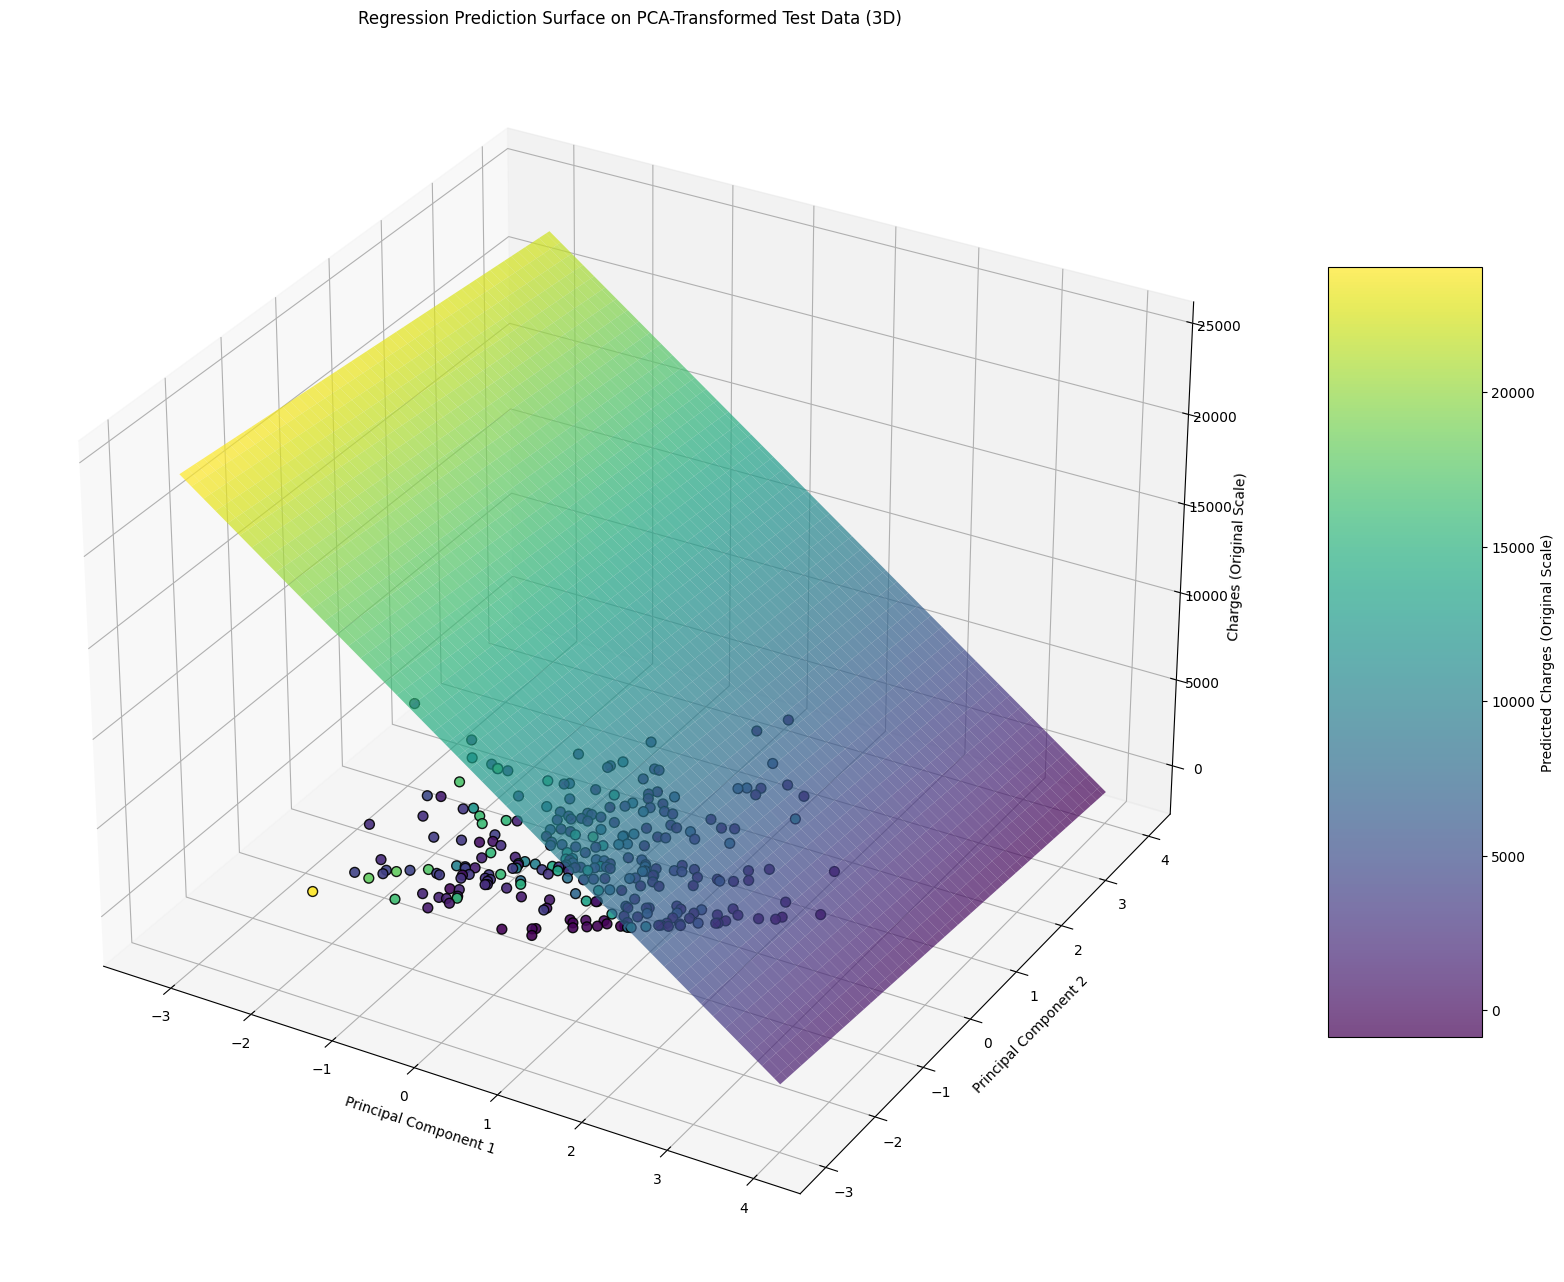

In [32]:
# --- Visualize the Regression Prediction Surface (3D) ---
print("\n--- Visualizing Regression Prediction Surface (3D) ---")

# Create a meshgrid over the 2D PCA feature space with range matching the reference image (-3 to 4)
x_min, x_max = -3.0, 4.0  # Adjusted to match the reference image range
y_min, y_max = -3.0, 4.0  # Adjusted to match the reference image range
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Prepare meshgrid for Keras model prediction
meshgrid_points = np.c_[xx.ravel(), yy.ravel()]

# Get continuous predictions from the model
# Keras model.predict automatically handles batching and returns numpy array
Z_predicted_scaled = model.predict(meshgrid_points).flatten()

# Inverse transform the predicted Z values to original scale for plotting
Z_predicted = y_scaler.inverse_transform(Z_predicted_scaled.reshape(-1, 1)).reshape(xx.shape)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d') # Create a 3D subplot

# Plot the predicted values as a surface
surface = ax.plot_surface(xx, yy, Z_predicted, cmap='viridis', alpha=0.7)
fig.colorbar(surface, shrink=0.5, aspect=5, label='Predicted Charges (Original Scale)')

# Overlay the actual test data points, colored by their true charges (original scale)
# Use X_test_pca for coordinates and y_test_raw for the z-value and color
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, c=y_test, cmap='viridis', edgecolors='k', s=50, alpha=0.9, label='Actual Charges')

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Charges (Original Scale)") # Z-axis label for regression output
ax.set_title("Regression Prediction Surface on PCA-Transformed Test Data (3D)") # Updated title
# ax.legend() # Legend might not work well in 3D; consider manual labeling if needed
plt.show()